In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import jieba

In [3]:
jan_df = pd.read_csv('../input/cweb-monthly-csv/tscCaseReport-1.1-1.31(China).csv')
jan_df.head()

,Case Number,Created Date,Closed Date,Part Number,TSC Accept WorkGroup,Current Case WorkGroup,TSCResolved,TSCAssisted,OfficeCase,ProductionCase,IR,IRDateTime,IRPeriodMinute,ReopenFlag,CaseClosed,OutsideOperationHours,CaseAcceptDate,CaseDispatchDate,StateName,CountryName,CaseTitle,AccountName,CaseOriginator,OpCo,TSC,CurrentCaseOwnerFName,CurrentCaseOwnerLName,TSCAcceptCaseOwnerFName,TSCAcceptCaseOwnerLName,Category
0,C2275431,02/01/2018 11:57 AM,02/01/2018 11:57 AM,DocuPrint M158 f,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 11:57 AM,0,False,True,False,02/01/2018 11:57 AM,02/01/2018 11:57 AM,China,China,卡纸 VIP,平安,Jie Ni,FXCL,SEOUL,Jie,Ni,Jie,Ni,Printer
1,C2275357,31/12/2017 01:57 PM,02/01/2018 11:59 AM,DocuCentre 2050,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 11:59 AM,2762,False,True,True,02/01/2018 11:59 AM,31/12/2017 01:57 PM,China,China,C-0 经销商客户,上海,Jack Lu,FXCL,SEOUL,Guanglin,Li,Guanglin,Li,Office
2,C2275276,29/12/2017 08:40 PM,02/01/2018 12:01 PM,DocuCentre S2110,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,29/12/2017 08:57 PM,17,False,True,True,02/01/2018 11:38 AM,29/12/2017 08:40 PM,China,China,设置IP 经销商合同,NaN,Seraphim Xue,FXCL,SEOUL,Jason,Zheng,Jason,Zheng,Office
3,C2275394,01/01/2018 07:55 PM,02/01/2018 12:04 PM,DocuCentre S2110,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 12:03 PM,967,False,True,False,02/01/2018 12:03 PM,01/01/2018 07:55 PM,China,China,设置网络扫描 经销商用户,NaN,Kira Ding,FXCL,SEOUL,Jason,Zheng,Jason,Zheng,Office
4,C2275360,31/12/2017 03:23 PM,02/01/2018 12:05 PM,ApeosPort-V C3375,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 11:44 AM,2660,False,True,True,02/01/2018 11:40 AM,31/12/2017 03:23 PM,China,China,刷卡后登入不上 有合同 加急,上海欧菲滤清器有限公司,Peggy Zhu,FXCL,SEOUL,David,Liu,David,Liu,Office


In [4]:
jan_df['TSC Accept WorkGroup'].value_counts()

TSC Seoul Two      7901
TSC Production      151
TSC Office One       12
TSC Seoul Three       3
Name: TSC Accept WorkGroup, dtype: int64

In [5]:
jan_df[jan_df['Part Number'].str.contains('DocuPrint CM118 w')].head()

,Case Number,Created Date,Closed Date,Part Number,TSC Accept WorkGroup,Current Case WorkGroup,TSCResolved,TSCAssisted,OfficeCase,ProductionCase,IR,IRDateTime,IRPeriodMinute,ReopenFlag,CaseClosed,OutsideOperationHours,CaseAcceptDate,CaseDispatchDate,StateName,CountryName,CaseTitle,AccountName,CaseOriginator,OpCo,TSC,CurrentCaseOwnerFName,CurrentCaseOwnerLName,TSCAcceptCaseOwnerFName,TSCAcceptCaseOwnerLName,Category
63,C2275547,02/01/2018 01:22 PM,02/01/2018 01:38 PM,DocuPrint CM118 w,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 01:33 PM,12,False,True,False,02/01/2018 01:33 PM,02/01/2018 01:22 PM,China,China,不能网络打印，win 7 无合同,NaN,Sadly Wu,FXCL,SEOUL,Allan,Chen,Allan,Chen,Printer
186,C2275862,02/01/2018 04:31 PM,02/01/2018 05:22 PM,DocuPrint CM118 w,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 04:34 PM,3,False,True,False,02/01/2018 04:34 PM,02/01/2018 04:31 PM,China,China,客户来电表示打印机无法连接到网络 操作系统win 7 无合同,个人用户,Sadly Wu,FXCL,SEOUL,Jeremy,Pan,Jeremy,Pan,Printer
232,C2275987,02/01/2018 06:10 PM,02/01/2018 06:25 PM,DocuPrint CM118 w,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 06:17 PM,7,False,True,False,02/01/2018 06:17 PM,02/01/2018 06:10 PM,China,China,wifi连接 win7 提示错误 可远程 无合同,不愿意提供,Sadly Wu,FXCL,SEOUL,Allan,Chen,Allan,Chen,Printer
239,C2275992,02/01/2018 06:16 PM,02/01/2018 06:32 PM,DocuPrint CM118 w,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 06:28 PM,12,False,True,False,02/01/2018 06:28 PM,02/01/2018 06:16 PM,China,China,无法共享打印 客户表示通过USB进行共享 无合同,个人,Sadly Wu,FXCL,SEOUL,Allan,Chen,Allan,Chen,Printer
504,C2276290,03/01/2018 12:03 PM,03/01/2018 03:18 PM,DocuPrint CM118 w,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,03/01/2018 12:04 PM,1,False,True,False,03/01/2018 12:04 PM,03/01/2018 12:03 PM,China,China,设置wifi打印 无合同,个人客户,Sadly Wu,FXCL,SEOUL,Jeremy,Pan,Jeremy,Pan,Printer


In [6]:
jan_df_office = jan_df[(jan_df.Category=='Office')&(jan_df['TSC Accept WorkGroup']=='TSC Seoul Two')].copy()
jan_df_office.head()

,Case Number,Created Date,Closed Date,Part Number,TSC Accept WorkGroup,Current Case WorkGroup,TSCResolved,TSCAssisted,OfficeCase,ProductionCase,IR,IRDateTime,IRPeriodMinute,ReopenFlag,CaseClosed,OutsideOperationHours,CaseAcceptDate,CaseDispatchDate,StateName,CountryName,CaseTitle,AccountName,CaseOriginator,OpCo,TSC,CurrentCaseOwnerFName,CurrentCaseOwnerLName,TSCAcceptCaseOwnerFName,TSCAcceptCaseOwnerLName,Category
1,C2275357,31/12/2017 01:57 PM,02/01/2018 11:59 AM,DocuCentre 2050,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 11:59 AM,2762,False,True,True,02/01/2018 11:59 AM,31/12/2017 01:57 PM,China,China,C-0 经销商客户,上海,Jack Lu,FXCL,SEOUL,Guanglin,Li,Guanglin,Li,Office
2,C2275276,29/12/2017 08:40 PM,02/01/2018 12:01 PM,DocuCentre S2110,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,29/12/2017 08:57 PM,17,False,True,True,02/01/2018 11:38 AM,29/12/2017 08:40 PM,China,China,设置IP 经销商合同,NaN,Seraphim Xue,FXCL,SEOUL,Jason,Zheng,Jason,Zheng,Office
3,C2275394,01/01/2018 07:55 PM,02/01/2018 12:04 PM,DocuCentre S2110,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 12:03 PM,967,False,True,False,02/01/2018 12:03 PM,01/01/2018 07:55 PM,China,China,设置网络扫描 经销商用户,NaN,Kira Ding,FXCL,SEOUL,Jason,Zheng,Jason,Zheng,Office
4,C2275360,31/12/2017 03:23 PM,02/01/2018 12:05 PM,ApeosPort-V C3375,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 11:44 AM,2660,False,True,True,02/01/2018 11:40 AM,31/12/2017 03:23 PM,China,China,刷卡后登入不上 有合同 加急,上海欧菲滤清器有限公司,Peggy Zhu,FXCL,SEOUL,David,Liu,David,Liu,Office
5,C2275421,02/01/2018 11:44 AM,02/01/2018 12:07 PM,DocuCentre-V 4070,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 11:58 AM,14,False,True,False,02/01/2018 11:58 AM,02/01/2018 11:44 AM,China,China,错误代码 有合同,杭州顶全便利店有限公司,Nicole Jiang,FXCL,SEOUL,David,Liu,David,Liu,Office


In [7]:
# jan_df_office.loc[ jan_df_office.TSCAcceptCaseOwnerFName == 'Knight']

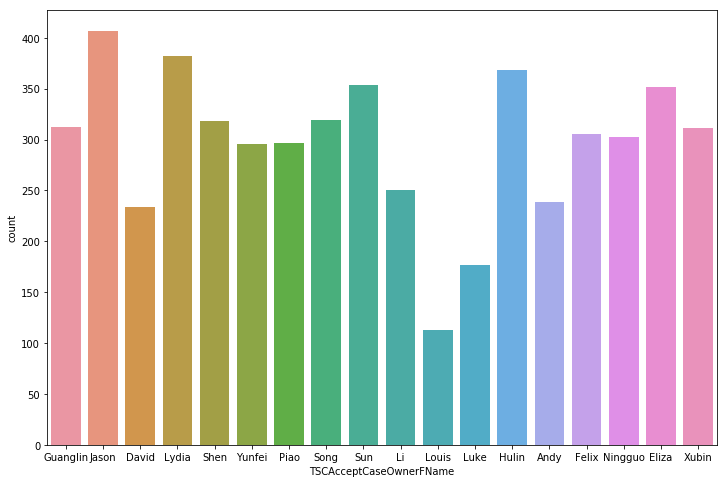

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(jan_df_office['TSCAcceptCaseOwnerFName'])

In [9]:
jan_df_office['Closed Date'] = pd.to_datetime(jan_df_office['Closed Date'], dayfirst=True)

In [10]:
jan_df_office['close_year'] = np.array([i.year for i in jan_df_office['Closed Date']])
jan_df_office['close_month'] = np.array([i.month for i in jan_df_office['Closed Date']])
jan_df_office['close_day'] = np.array([i.day for i in jan_df_office['Closed Date']])
jan_df_office['close_hour'] = np.array([i.hour for i in jan_df_office['Closed Date']])

In [11]:
# jan_df_office.head()

In [12]:
pivot = jan_df_office.pivot_table(index=['TSCAcceptCaseOwnerFName'], 
                                  columns=['close_day'],
                                  values=['Case Number'], aggfunc='count')
pivot.columns = pivot.columns.droplevel()
pivot

close_day,2,3,4,5,8,9,10,11,12,15,16,17,18,19,22,23,24,25,26,29,30,31
TSCAcceptCaseOwnerFName,,,,,,,,,,,,,,,,,,,,,,
Andy,NaN,19.0,23.0,12.0,16.0,14.0,12.0,12.0,15.0,16.0,15.0,NaN,12.0,11.0,NaN,NaN,NaN,7.0,12.0,15.0,14.0,14.0
David,15.0,12.0,18.0,11.0,9.0,9.0,9.0,12.0,9.0,14.0,10.0,13.0,13.0,11.0,12.0,13.0,11.0,6.0,5.0,9.0,6.0,7.0
Eliza,NaN,NaN,NaN,21.0,21.0,21.0,20.0,18.0,23.0,18.0,24.0,19.0,21.0,15.0,21.0,16.0,18.0,15.0,11.0,16.0,17.0,17.0
Felix,NaN,NaN,28.0,29.0,25.0,18.0,9.0,26.0,22.0,36.0,29.0,25.0,20.0,12.0,1.0,NaN,NaN,NaN,NaN,16.0,8.0,1.0
Guanglin,18.0,23.0,24.0,15.0,27.0,15.0,NaN,20.0,10.0,5.0,NaN,NaN,NaN,13.0,45.0,19.0,11.0,17.0,NaN,14.0,17.0,19.0
Hulin,NaN,23.0,19.0,17.0,20.0,19.0,18.0,NaN,22.0,NaN,21.0,20.0,20.0,23.0,18.0,21.0,22.0,18.0,15.0,17.0,18.0,17.0
Jason,23.0,21.0,19.0,14.0,25.0,18.0,17.0,22.0,17.0,21.0,24.0,22.0,16.0,11.0,24.0,16.0,18.0,20.0,8.0,21.0,14.0,16.0
Li,23.0,17.0,16.0,NaN,NaN,NaN,NaN,1.0,15.0,22.0,16.0,14.0,14.0,15.0,15.0,19.0,14.0,19.0,14.0,15.0,NaN,1.0
Louis,10.0,5.0,NaN,NaN,5.0,7.0,6.0,8.0,4.0,NaN,7.0,6.0,5.0,2.0,11.0,8.0,8.0,4.0,3.0,NaN,8.0,6.0


In [13]:
# plt.scatter(x=pivot[1].columns, y=pivot[1].index)

In [14]:
# x = jan_df_office[jan_df_office['create_month']==1]['create_day']
# y = jan_df_office[jan_df_office['create_month']==1]['TSCAcceptCaseOwnerFName']
# data = jan_df_office[jan_df_office['create_month']==1]['Case Number'].count()
# type(x)

In [15]:
# x = pd.Series(pivot[1].columns.tolist())
# y = pd.Series(pivot[1].index.tolist())

In [16]:
# sns.scatterplot(x=x, y=y)

MFD Model

In [17]:
jan_df_office['Part Number'].value_counts()[:10]

DocuCentre S2110                  631
DocuCentre SC2020-For China/KO    564
DocuCentre S2011 - for China/K    464
DocuCentre-V C2265                296
DocuCentre S2520-For China/KOR    295
DocuCentre-IV C2265               210
DocuCentre S1810-For China/KOR    168
DocuCentre V C3373                143
DocuCentre-V 3060                 136
DocuCentre-V 2060                 129
Name: Part Number, dtype: int64

In [18]:
a = pd.DataFrame(['DocuCentre - IV 3065','4475'], columns=['model'])
a['model'] = a['model'].apply(lambda x: x.replace('-', '')) 
a['model'] = a['model'].replace('4475', '3373')
a['model'] = a['model'].replace('3065', '3060')
a

,model
0,DocuCentre IV 3065
1,3373


In [19]:
jan_df_office['Part Number'] = jan_df_office['Part Number'].apply(
    lambda y: y.replace('-', ' ')).apply(
    lambda y: y.replace('for', '')).apply(
    lambda y: y.replace('for', '')).apply(
    lambda y: y.replace('For', '')).apply(
    lambda y: y.replace('China', '')).apply(
    lambda y: y.replace('china', '')).apply(
    lambda y: y.replace('KOR', '')).apply(
    lambda y: y.replace('KO', '')).apply(
    lambda y: y.replace('/K', '')).apply(
    lambda y: y.replace('/', '')).apply(
    lambda y: y.replace(' ', '')).apply(
    lambda y: y.replace('otherOPCOs', ''))

In [20]:
model_list = jan_df_office['Part Number'].value_counts()[:10].index.tolist()

In [21]:
# this doesn't make sense just review .loc[ ]
# top10_model_df = jan_df_office.loc[jan_df_office['Part Number'].isin(model_list) ]
# sns.countplot(top10_model_df['Part Number'])

> ```value_counts()[:10].plot(kind'bar', rot=45, figsize=(12,8))``` 
**better than** 
```sns.countplot()```, and also the color is same.

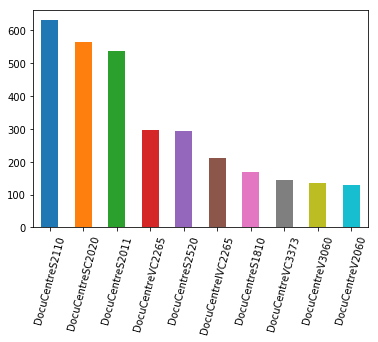

In [22]:
jan_df_office['Part Number'].value_counts()[:10].plot(kind='bar', rot=75)

Error code -> word cloud 

In [23]:
import re
from wordcloud import WordCloud

In [24]:
case_title_df = jan_df_office.copy()

In [25]:
case_title_df[case_title_df.index == 8039]

,Case Number,Created Date,Closed Date,Part Number,TSC Accept WorkGroup,Current Case WorkGroup,TSCResolved,TSCAssisted,OfficeCase,ProductionCase,IR,IRDateTime,IRPeriodMinute,ReopenFlag,CaseClosed,OutsideOperationHours,CaseAcceptDate,CaseDispatchDate,StateName,CountryName,CaseTitle,AccountName,CaseOriginator,OpCo,TSC,CurrentCaseOwnerFName,CurrentCaseOwnerLName,TSCAcceptCaseOwnerFName,TSCAcceptCaseOwnerLName,Category,close_year,close_month,close_day,close_hour
8039,C2297980,31/01/2018 07:41 PM,2018-01-31 19:43:00,DocuCentreSC2020,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,31/01/2018 07:42 PM,1,False,True,False,31/01/2018 07:41 PM,31/01/2018 07:41 PM,China,China,续C2297920 第二台电脑 设置扫描 经销商用户,NaN,Shen Xin,FXCL,SEOUL,Shen,Xin,Shen,Xin,Office,2018,1,31,19


- ```[0-9]\d{0,2}```后面的数字可以有0-2位
- ```[0-9]\d{2}```后面的数字只可以有2位

In [26]:
case_title_df['error_code'] = case_title_df['CaseTitle'].apply(lambda x: re.findall('[0-9]+', x))
# case_title_df['error_code'] = case_title_df['error_code'].apply(lambda y: [0] if len(y)==0 else y)
case_title_df['error_code'] = case_title_df['error_code'].apply(lambda y: [0] if len(y)==1 else y)

In [27]:
case_title_df['error_code'] = case_title_df['error_code'].apply(lambda u: [i for i in u if int(i)>10 and int(i)<1000])

In [28]:
case_title_df['error_code'] = case_title_df['error_code'].apply(lambda v: '-'.join(v))

In [29]:
case_title_df['error_code'] = case_title_df['error_code'].apply(lambda z: 'N' if len(z)==0 else z)

In [30]:
case_title_df['error_code']

1             N
2             N
3             N
4             N
5             N
7             N
8             N
9             N
10            N
11            N
12            N
13            N
14            N
15            N
16      027-520
17            N
18      021-403
23            N
24            N
26            N
29            N
30      018-505
33            N
36            N
38            N
41            N
42            N
43            N
45            N
46            N
         ...   
8021          N
8023          N
8025          N
8026          N
8027          N
8029          N
8030          N
8032          N
8034          N
8035          N
8037          N
8039          N
8042    016-799
8044          N
8047          N
8048          N
8049          N
8050          N
8051          N
8054          N
8056          N
8057          N
8058          N
8059          N
8060          N
8061          N
8063          N
8064          N
8065          N
8066          N
Name: error_code, Length

In [31]:
error_code_df = case_title_df[(case_title_df['error_code']!='N')&(case_title_df['error_code']).str.contains('-')]

In [32]:
error_code_df.head()

,Case Number,Created Date,Closed Date,Part Number,TSC Accept WorkGroup,Current Case WorkGroup,TSCResolved,TSCAssisted,OfficeCase,ProductionCase,IR,IRDateTime,IRPeriodMinute,ReopenFlag,CaseClosed,OutsideOperationHours,CaseAcceptDate,CaseDispatchDate,StateName,CountryName,CaseTitle,AccountName,CaseOriginator,OpCo,TSC,CurrentCaseOwnerFName,CurrentCaseOwnerLName,TSCAcceptCaseOwnerFName,TSCAcceptCaseOwnerLName,Category,close_year,close_month,close_day,close_hour,error_code
16,C2275206,29/12/2017 07:26 PM,2018-01-02 12:39:00,DocuCentreS2520,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,29/12/2017 07:44 PM,17,False,True,False,02/01/2018 11:37 AM,29/12/2017 07:26 PM,China,China,扫描报错 027-520 要求元旦后1/2号联系 经销商客户,NaN,Tomi Wu,FXCL,SEOUL,Jason,Zheng,Jason,Zheng,Office,2018,1,2,12,027-520
18,C2275476,02/01/2018 12:39 PM,2018-01-02 12:46:00,DocuCentreVC3375,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 12:43 PM,4,False,True,False,02/01/2018 12:43 PM,02/01/2018 12:39 PM,China,China,机器没有连接互联网故报错021-403 询问如何让此错误代码不再显示 有合同,椿本链条(天津)有限公司,Sadly Wu,FXCL,SEOUL,Yunfei,Zhu,Yunfei,Zhu,Office,2018,1,2,12,021-403
30,C2275371,31/12/2017 07:18 PM,2018-01-02 12:59:00,DocuCentreVC2265,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 12:56 PM,2498,False,True,True,02/01/2018 12:54 PM,31/12/2017 07:18 PM,China,China,网线连接扫描报错：018-505 经销商用户 加急,SN,Peggy Zhu,FXCL,SEOUL,David,Liu,David,Liu,Office,2018,1,2,12,018-505
64,C2275548,02/01/2018 01:23 PM,2018-01-02 13:38:00,DocuCentreV3060,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 01:31 PM,8,False,True,False,02/01/2018 01:31 PM,02/01/2018 01:23 PM,China,China,"无法网络打印和网络扫描,打印问题报错：027-452，扫描问题提示与其他网络冲突 有合同",善林(上海)金融信息服务有限公司,Sadly Wu,FXCL,SEOUL,Yunfei,Zhu,Yunfei,Zhu,Office,2018,1,2,13,027-452
81,C2275553,02/01/2018 01:30 PM,2018-01-02 13:56:00,DocuCentreV2060,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 01:43 PM,12,False,True,False,02/01/2018 01:48 PM,02/01/2018 01:30 PM,China,China,报错018-755 需要设置网络扫描 有合同,富士施乐租赁(中国)有限公司,Tomi Wu,FXCL,SEOUL,Lydia,Li,Lydia,Li,Office,2018,1,2,13,018-755


In [33]:
error_code_df.error_code.value_counts()

018-755            28
016-799            28
018-505            28
031-522            20
027-452            17
027-504            17
031-528            14
026-737            13
016-757            11
027-516            10
018-747             9
018-772             9
027-522             9
016-772             8
016-503             8
027-520             6
016-749             6
027-779             6
027-518             5
016-704             5
021-403             5
027-513             5
016-781             5
116-324             5
024-747             4
027-589             4
016-758             4
016-720             4
024-959             4
016-576             4
                   ..
017-779             1
192-168-21-85       1
134-211             1
24-14               1
116-321             1
11-30               1
062-371             1
027-504-30          1
016-555             1
016-45              1
13-30               1
016-593             1
163-117             1
027-777             1
88-126    

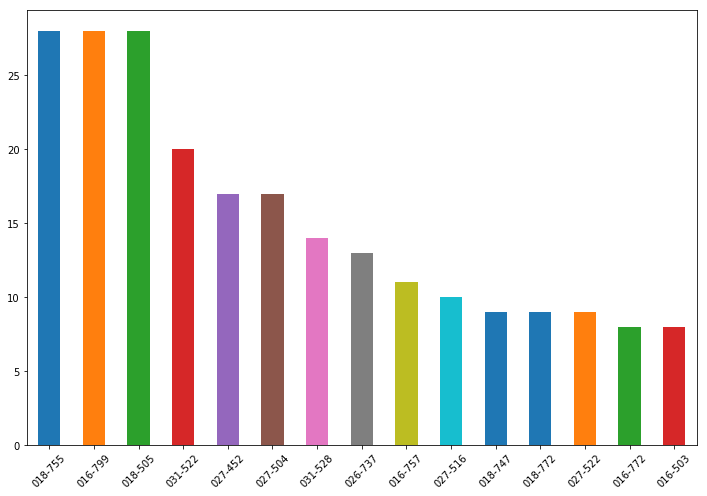

In [34]:
error_code_df.error_code.value_counts()[:15].plot(kind='bar', figsize=(12,8), rot=45)

In [35]:
# for i in error_code_df['error_code']:
#     print(i)

In [36]:
error_code_df['error_code'].tolist()

['027-520',
 '021-403',
 '018-505',
 '027-452',
 '018-755',
 '018-772',
 '027-516',
 '018-505',
 '027-452',
 '027-452',
 '018-755',
 '018-505',
 '018-755',
 '027-522',
 '016-749',
 '016-799',
 '016-757',
 '016-722',
 '031-528',
 '027-452',
 '031-522',
 '024-959',
 '027-513',
 '016-758',
 '061-768',
 '092-313',
 '031-522',
 '027-452',
 '016-772',
 '031-522',
 '016-503',
 '116-324',
 '018-747',
 '016-765',
 '031-528',
 '027-520',
 '016-799',
 '016-503',
 '018-747',
 '016-593',
 '018-505',
 '027-211',
 '016-576',
 '027-522',
 '027-452',
 '016-720',
 '016-758',
 '101-327',
 '016-768',
 '016-799',
 '016-503',
 '033-546',
 '016-772',
 '018-755',
 '026-737',
 '027-516',
 '016-503',
 '24-14',
 '016-757',
 '031-522',
 '027-520',
 '031-522',
 '027-522',
 '016-503',
 '026-737',
 '018-505',
 '016-503',
 '016-722',
 '018-759',
 '062-371',
 '32-64',
 '026-737',
 '031-523',
 '027-504',
 '031-522',
 '016-749',
 '026-737',
 '018-505',
 '027-522',
 '016-507',
 '018-747',
 '018-772',
 '016-799',
 '031-52

In [37]:
code_list = error_code_df['error_code'].tolist()
EC_list = []
for i in code_list:
    EC_list.append(str(i))
long_text = ' '.join(EC_list)
long_text

'027-520 021-403 018-505 027-452 018-755 018-772 027-516 018-505 027-452 027-452 018-755 018-505 018-755 027-522 016-749 016-799 016-757 016-722 031-528 027-452 031-522 024-959 027-513 016-758 061-768 092-313 031-522 027-452 016-772 031-522 016-503 116-324 018-747 016-765 031-528 027-520 016-799 016-503 018-747 016-593 018-505 027-211 016-576 027-522 027-452 016-720 016-758 101-327 016-768 016-799 016-503 033-546 016-772 018-755 026-737 027-516 016-503 24-14 016-757 031-522 027-520 031-522 027-522 016-503 026-737 018-505 016-503 016-722 018-759 062-371 32-64 026-737 031-523 027-504 031-522 016-749 026-737 018-505 027-522 016-507 018-747 018-772 016-799 031-522 016-799 016-764 018-505 016-799 018-505 062-360 024-911 024-965 027-552 026-737 016-749 018-505 031-522 024-966 016-799 027-543 018-505 018-761 031-528-031-522 027-504 031-522 024-963 016-757 016-765 018-755 016-799 018-755 14-24 88-126-062-371 062-956 126-226 077-110 016-799 018-505 027-518 018-755 026-737 016-720 016-506 027-52

In [38]:
# wordcloud = WordCloud().generate(long_text)
# plt.imshow(wordcloud)

# ValueError: We need at least 1 word to plot a word cloud, got 0.

Get error code from case title text

In [39]:
err_code_list = ['016-799','018-505','018-755','031-522','027-504','027-452',
 '031-528','026-737','016-757','027-516' ]

err_code_dict = dict((x,0) for x in err_code_list)

for err in err_code_list:
    count = jan_df_office['CaseTitle'].str.contains(err).sum()
    err_code_dict[err] = count
err_code_dict_list = sorted(err_code_dict.items(), key=lambda x:x[1], reverse=True)
err_code_df = pd.DataFrame(err_code_dict_list, columns=['code', 'count'])
err_code_df

,code,count
0,018-505,30
1,018-755,30
2,016-799,29
3,031-522,21
4,027-504,19
5,027-452,17
6,031-528,15
7,026-737,13
8,016-757,11
9,027-516,10


word cloud

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.228 seconds.
Prefix dict has been built succesfully.


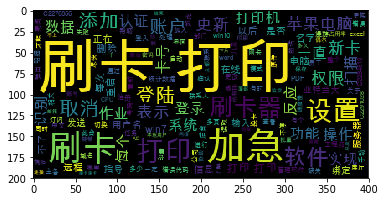

In [40]:
# text example
key_word = ['打印','复印','扫描','传真','刷卡']
stop_words = ['，','。','、','！','(',')','（','）',',','.','!',' ','-','；',
             '有','合同','经销商','用户','咨询','施乐','客户','要求','机器','无法','出现','复印机','显示','提示',
            '代码','安装','报错','开机','故障','问题','谢谢','现在','使用','没有','可以','请问','怎么','还是','正常','这个','但是',
            '需要','解决','您好','已经','不能','文件','依旧','不到','用户','时候','之后','你好','什么','一样','如何']
final = ''
# def plot_wordcloud(key_word):
search_bool = jan_df_office['CaseTitle'].str.contains('刷卡')
search_result_list = jan_df_office[search_bool]['CaseTitle'].tolist()
# cut_word = jieba.cut(search_result)
# for i in cut_word:
# long_text = ' '.join(cut_word)

for result in search_result_list:
    cut = list(jieba.cut(result)) 
    #jieba can only cut text not list
    for i in cut:
        if i not in stop_words:
            final = final+i+' '
final    
word_cloud = WordCloud(font_path='../input/arial-unicode/Arial Unicode.ttf').generate(final)
plt.imshow(word_cloud)

In [41]:
def plot_word_cloud(df, stopwords, key_word=None):  
    if key_word:
        search_bool = df['CaseTitle'].str.contains(key_word)
        search_result_list = df[search_bool]['CaseTitle'].tolist()
    else:
        search_result_list = df['CaseTitle'].tolist()
    final = ''
    for result in search_result_list:
        word_cut = list(jieba.cut(result))
        for word in word_cut:
            if word not in stopwords and word != key_word:
                # key_word as a stopword and remove it
                final = final + word + ' '
    word_cloud = WordCloud(scale=1.5,collocations=False,font_path='../input/arial-unicode/Arial Unicode.ttf',background_color='white').generate(final)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()   

# SyntaxError: non-default argument follows default argument    
# https://blog.csdn.net/you23hai45/article/details/70388146
# put last position

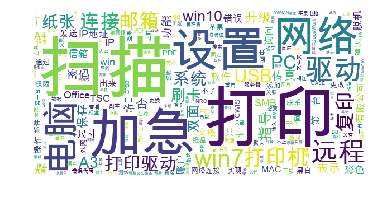

In [42]:
plot_word_cloud(jan_df_office,stop_words)

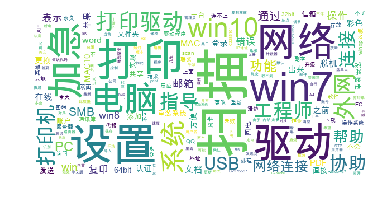

In [43]:
plot_word_cloud(jan_df_office,stop_words,'远程')

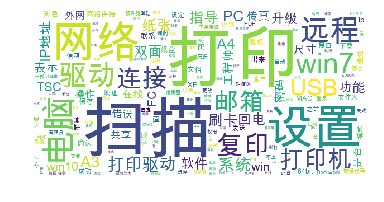

In [44]:
plot_word_cloud(jan_df_office,stop_words,'加急')

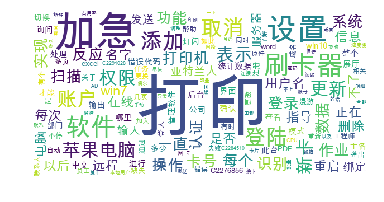

In [45]:
plot_word_cloud(jan_df_office,stop_words,'刷卡')

classify DMP, NonDMP

In [46]:
new_df = jan_df_office.copy()

In [47]:
# count = 0
for i in ['II','III','IV','V','VI']:
    mask_bool = new_df['Part Number'].str.contains(i)    
    print(i,mask_bool.sum())
    new_df.loc[mask_bool, 'cate'] = 'DMP'
    # loc will create a column if doesn't exist
new_df.cate.fillna('NonDMP', inplace=True)
# print(new_df.shape[0])

II 97
III 68
IV 858
V 2462
VI 205


In [48]:
new_df.head()

,Case Number,Created Date,Closed Date,Part Number,TSC Accept WorkGroup,Current Case WorkGroup,TSCResolved,TSCAssisted,OfficeCase,ProductionCase,IR,IRDateTime,IRPeriodMinute,ReopenFlag,CaseClosed,OutsideOperationHours,CaseAcceptDate,CaseDispatchDate,StateName,CountryName,CaseTitle,AccountName,CaseOriginator,OpCo,TSC,CurrentCaseOwnerFName,CurrentCaseOwnerLName,TSCAcceptCaseOwnerFName,TSCAcceptCaseOwnerLName,Category,close_year,close_month,close_day,close_hour,cate
1,C2275357,31/12/2017 01:57 PM,2018-01-02 11:59:00,DocuCentre2050,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 11:59 AM,2762,False,True,True,02/01/2018 11:59 AM,31/12/2017 01:57 PM,China,China,C-0 经销商客户,上海,Jack Lu,FXCL,SEOUL,Guanglin,Li,Guanglin,Li,Office,2018,1,2,11,NonDMP
2,C2275276,29/12/2017 08:40 PM,2018-01-02 12:01:00,DocuCentreS2110,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,29/12/2017 08:57 PM,17,False,True,True,02/01/2018 11:38 AM,29/12/2017 08:40 PM,China,China,设置IP 经销商合同,NaN,Seraphim Xue,FXCL,SEOUL,Jason,Zheng,Jason,Zheng,Office,2018,1,2,12,NonDMP
3,C2275394,01/01/2018 07:55 PM,2018-01-02 12:04:00,DocuCentreS2110,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 12:03 PM,967,False,True,False,02/01/2018 12:03 PM,01/01/2018 07:55 PM,China,China,设置网络扫描 经销商用户,NaN,Kira Ding,FXCL,SEOUL,Jason,Zheng,Jason,Zheng,Office,2018,1,2,12,NonDMP
4,C2275360,31/12/2017 03:23 PM,2018-01-02 12:05:00,ApeosPortVC3375,TSC Seoul Two,TSC Seoul Two,True,False,True,False,False,02/01/2018 11:44 AM,2660,False,True,True,02/01/2018 11:40 AM,31/12/2017 03:23 PM,China,China,刷卡后登入不上 有合同 加急,上海欧菲滤清器有限公司,Peggy Zhu,FXCL,SEOUL,David,Liu,David,Liu,Office,2018,1,2,12,DMP
5,C2275421,02/01/2018 11:44 AM,2018-01-02 12:07:00,DocuCentreV4070,TSC Seoul Two,TSC Seoul Two,True,False,True,False,True,02/01/2018 11:58 AM,14,False,True,False,02/01/2018 11:58 AM,02/01/2018 11:44 AM,China,China,错误代码 有合同,杭州顶全便利店有限公司,Nicole Jiang,FXCL,SEOUL,David,Liu,David,Liu,Office,2018,1,2,12,DMP


In [49]:
a = pd.DataFrame(['DocuCentreS2110','DocuCentreV4070','ApeosPortVC3375'],columns=['model'])
a.model.str.contains('V')

0    False
1     True
2     True
Name: model, dtype: bool

In [50]:
new_df.cate.value_counts()

NonDMP    2777
DMP       2559
Name: cate, dtype: int64

In [51]:
# test example end

DMP VS NonDMP in the past year

In [52]:
root = '../input/cweb-monthly-csv/'

In [53]:
csv_list = [root+i for i in os.listdir(root)]
# csv_list

In [54]:
def tag_dmp(csv_list):
    df_list = []
    for csv in csv_list:
        month_df = pd.read_csv(csv, usecols=['Part Number','Category','TSC Accept WorkGroup'])
        month_df_office = month_df[(month_df.Category=='Office')&(month_df['TSC Accept WorkGroup']=='TSC Seoul Two')]
        for i in ['II','III','IV','V','VI']:
            mask_bool = month_df_office['Part Number'].str.contains(i)
            month_df_office.loc[mask_bool, 'cate'] = 'DMP'
        month_df_office.cate.fillna('NonDMP', inplace=True)
        df_list.append(month_df_office)
    df = pd.concat(df_list, axis=0, ignore_index=True)    
    return df

In [55]:
df = tag_dmp(csv_list)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

In [56]:
df.head()

,Part Number,TSC Accept WorkGroup,Category,cate
0,DocuCentre S1810-For China/KOR,TSC Seoul Two,Office,NonDMP
1,ApeosPort-V 4070,TSC Seoul Two,Office,DMP
2,DocuCentre V C3375,TSC Seoul Two,Office,DMP
3,DocuCentre-IV C3373,TSC Seoul Two,Office,DMP
4,DocuCentre-IV C2265,TSC Seoul Two,Office,DMP


In [57]:
df.cate.value_counts()

NonDMP    29973
DMP       24732
Name: cate, dtype: int64

In [58]:
df['Part Number'].value_counts()

DocuCentre S2011 - for China/K    6069
DocuCentre SC2020-For China/KO    6067
DocuCentre S2110                  4839
DocuCentre S2520-For China/KOR    3239
DocuCentre-V C2265                2976
DocuCentre-IV C2265               2077
DocuCentre S1810-For China/KOR    1474
DocuCentre-V 2060                 1342
DocuCentre-V 3065                 1168
DocuCentre V C3373                1114
DocuCentre-V 3060                 1081
DocuCentre V C3375                 957
DocuCentre-V C2263                 864
DocuCentre-IV C3373                861
DocuPrint CM118 w                  836
DocuCentre VI C3370                756
DC5C3373-T                         685
DocuCentre-IV 2060                 666
DocuCentre-IV C2263                647
DocuCentre-IV 3065                 598
DC2056CPS                          582
DocuCentre-IV C2260                577
DocuCentre-IV C3375                576
DocuCentre S2220-For China/KOR     455
AP5C4475                           447
DocuCentre S2011 - other 

In [59]:
# remove DocuPrint and change AP5C.. to DMP

In [60]:
df[df['Part Number'] == 'DocuPrint CM118 w'].shape[0]

836

In [61]:
df[df['Part Number'].str.contains('DocuPrint')].shape[0]

1124

In [62]:
filter_df = df.copy()

In [63]:
# wrong_cate_bool = filter_df['Part Number'].str.contains('DocuPrint')
# filter_df.loc[wrong_cate_bool,'cate'] = 'NonDMP'
# No use. becuse docuprint doesn't contain [V VI ...]

In [64]:
filter_df[filter_df['Part Number'].str.contains('DocuPrint')].head()
# classification is right cus it doesn't contain V VI ...

,Part Number,TSC Accept WorkGroup,Category,cate
56,DocuPrint CM118 w,TSC Seoul Two,Office,NonDMP
115,DocuPrint CM118 w,TSC Seoul Two,Office,NonDMP
207,DocuPrint CM118 w,TSC Seoul Two,Office,NonDMP
297,DocuPrint P118w,TSC Seoul Two,Office,NonDMP
353,DocuPrint P118w,TSC Seoul Two,Office,NonDMP


In [65]:
filter_df[filter_df['Part Number'].str.contains('DocuPrint')].shape

(1124, 4)

In [66]:
filter_df[~filter_df['Part Number'].str.contains('DocuPrint')].shape

(53581, 4)

In [67]:
filter_df = filter_df[~filter_df['Part Number'].str.contains('DocuPrint')]

In [68]:
filter_df.shape

(53581, 4)

In [69]:
filter_df.cate.value_counts()

NonDMP    28849
DMP       24732
Name: cate, dtype: int64

In [70]:
24732/filter_df.shape[0]

0.46158153076650305

In [71]:
filter_df[filter_df['Part Number'].str.contains('AP5')].head()
# wrong classification

,Part Number,TSC Accept WorkGroup,Category,cate
264,AP5C4475,TSC Seoul Two,Office,NonDMP
268,AP5C4475,TSC Seoul Two,Office,NonDMP
348,AP5C4475,TSC Seoul Two,Office,NonDMP
374,AP5C4475,TSC Seoul Two,Office,NonDMP
404,AP5C4475,TSC Seoul Two,Office,NonDMP


In [72]:
a = filter_df['Part Number'].str.contains('AP5')
b = filter_df['Part Number'].str.contains('AP4')
c = filter_df['Part Number'].str.contains('DC5')
d = filter_df['Part Number'].str.contains('DC4')
e = filter_df['Part Number'].str.contains('AP6')
f = filter_df['Part Number'].str.contains('DC6')
g = filter_df['Part Number'].str.contains('DC3')
print(a.sum(), b.sum(), c.sum(), d.sum(), e.sum(), f.sum(), g.sum())
# 1026 9 1243 387 451 631 12

1109 46 1254 458 451 631 31


In [73]:
filter_df.loc[a, 'cate'] = 'DMP'
filter_df.loc[b, 'cate'] = 'DMP'
filter_df.loc[c, 'cate'] = 'DMP'
filter_df.loc[d, 'cate'] = 'DMP'
filter_df.loc[e, 'cate'] = 'DMP'
filter_df.loc[f, 'cate'] = 'DMP'
filter_df.loc[g, 'cate'] = 'DMP'

In [74]:
filter_df.cate.value_counts()

DMP       28712
NonDMP    24869
Name: cate, dtype: int64

In [75]:
# filter_df['Part Number'].value_counts()

In [76]:
24869 / filter_df.shape[0]

0.46413840727123423

full year word cloud

In [77]:
def wordcloud_df_only(csv_list):
    data_df_list = []
    for csv in csv_list:
        data_df = pd.read_csv(csv, usecols=['CaseTitle'])
        data_df_list.append(data_df)
    full_df = pd.concat(data_df_list, axis=0, ignore_index=True)
    return full_df
# better to create the full year df seperately for easy duplicate use

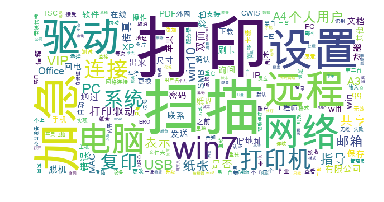

In [78]:
full_df = wordcloud_df_only(csv_list)
plot_word_cloud(full_df, stop_words)